# Experiment - 5 (K-Nearest Neighbours)

Name : Shruti Hore

PRN : 24070126172

---

**Title:**

Implementation of Implementation of K-Nearest Neighbors (KNN) for Classification   

---

**Aim:**

To apply the K-Nearest Neighbors (KNN) algorithm for classification and to understand its mechanism and performance.
  Objective: Students will learn
•	Implementation of the KNN classification algorithm on the given dataset(s).
•	To evaluate and understand the effect of different values of K (the number of neighbors) on model performance.
•	To visualize and interpret the results effectively.

---

**Problem statement**

Use the given dataset(s) to demonstrate the application of K-Nearest Neighbors (KNN) classification. The task is to identify the class of the query instance using k-nearest neighbors.

---


# K-Nearest Neighbours (KNN)

---

## Brief Description of K-Nearest Neighbours

K-Nearest Neighbours (KNN) is a **supervised machine learning algorithm** used for **classification and regression** problems.  
It is a **non-parametric** and **instance-based (lazy learning)** algorithm.

Key characteristics:
- No explicit training phase
- Stores the entire training dataset
- Predictions are made using similarity (distance) measures

The class of a test data point is decided by the **majority vote of its K nearest neighbors**.

---

## Stepwise Procedure / Algorithm of KNN

### Algorithm: K-Nearest Neighbours

1. Select the value of **K** (number of neighbors)
2. Choose an appropriate **distance metric**
3. For a test data point:
   - Compute distance between test point and all training points
4. Sort distances in ascending order
5. Select the **K nearest neighbors**
6. Apply voting:
   - **Classification** → majority class
   - **Regression** → average of values
7. Output the predicted result

---

## 3. Mathematical Formulation of KNN

### Euclidean Distance

For two data points  
\( X = (x_1, x_2, ..., x_n) \)  
\( Y = (y_1, y_2, ..., y_n) \)

\[
$
d(X, Y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$
\]

---


## Importance of K-Nearest Neighbours

- Simple and easy to understand
- No assumptions about data distribution
- Works well for non-linear data
- Suitable for multi-class classification
- Effective as a baseline model
- Adaptable to different distance metrics

---

## Applications of K-Nearest Neighbours

- Pattern Recognition (digit recognition)
- Recommendation Systems
- Medical Diagnosis
- Image Classification
- Text Classification (spam detection)
- Fraud and Anomaly Detection

---



In [127]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    r2_score
)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [128]:
# Load dataset
iris = load_iris()

In [129]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [130]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [131]:
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [132]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [133]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [134]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [135]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [136]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal Length vs Sepal Width (Setosa vs Versicolor)

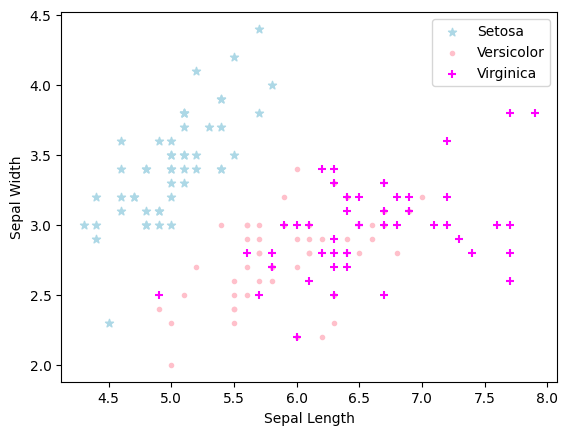

In [138]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(df0['sepal length (cm)'],
            df0['sepal width (cm)'],
            color='lightblue',
            marker='*',
            label="Setosa")

plt.scatter(df1['sepal length (cm)'],
            df1['sepal width (cm)'],
            color='pink',
            marker='.',
            label="Versicolor")

plt.scatter(df2['sepal length (cm)'],
            df2['sepal width (cm)'],
            color='magenta',
            marker='+',
            label="Virginica")

plt.legend()
plt.show()

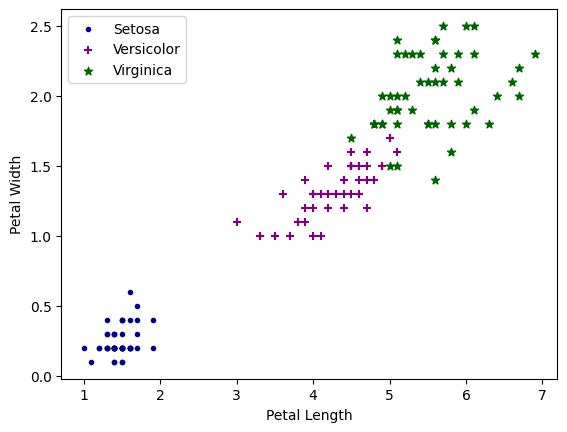

In [139]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],
            df0['petal width (cm)'],
            color='darkblue',
            marker='.',
            label="Setosa")

plt.scatter(df1['petal length (cm)'],
            df1['petal width (cm)'],
            color='purple',
            marker='+',
             label="Versicolor")

plt.scatter(df2['petal length (cm)'],
            df2['petal width (cm)'],
            color='darkgreen',
            marker='*',
            label="Virginica")

plt.legend()
plt.show()

# Train Test Split

In [140]:
# independent features
x = df.drop(['target', 'flower_name'],
            axis='columns')

# dependent features
y = df.target

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25,
                                                    random_state=68)

# Applying KNN

In [142]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)

In [143]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [144]:
knn.score(x_test, y_test)

1.0

In [145]:
knn.predict([[4.8, 3.0, 1.5, 0.3]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

# Plot the confusion matrix

In [146]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)

CM = confusion_matrix(y_test, y_pred) # true value, predicted value
CM

array([[13,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 13]])

In [147]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



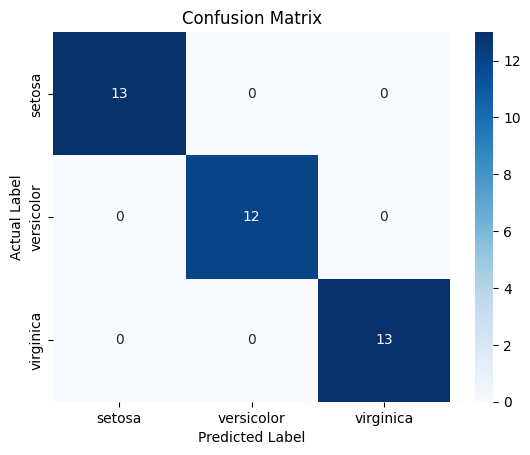

In [148]:
plt.figure()
sns.heatmap(
    CM,
    annot=True,
    cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [149]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE :", rmse)
print("R2 Score :", r2)

MSE : 0.0
RMSE : 0.0
R2 Score : 1.0


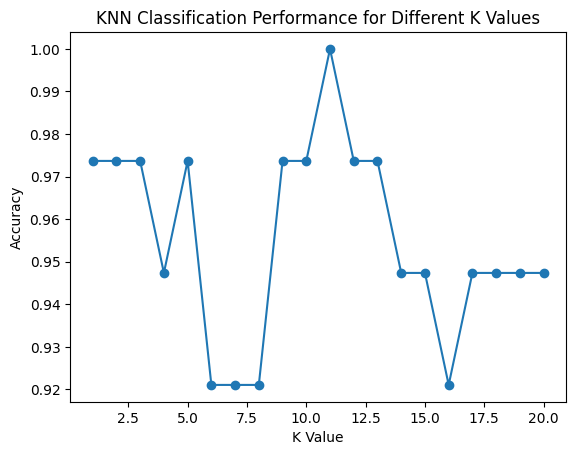

In [150]:
accuracy_values = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    accuracy_values.append(accuracy_score(y_test, pred))

plt.plot(range(1, 21), accuracy_values, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Classification Performance for Different K Values")
plt.show()


Small K values lead to overfitting, while larger K values improve generalization. Beyond K ≈ 15, the model shows diminishing returns.

### Input

- **Dataset**: Labeled dataset with features and target variable
- **User Input**: Value of K

---

### Output

- **Predicted class labels**
- **Model Evaluation Metrics**
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - Confusion Matrix
- **Visualizations**
  - Decision boundary plot
  - Confusion matrix heatmap
  - Accuracy vs K plot

---

# Conclusion: Impact of K

### Small K Value
- Low bias
- High variance
- Sensitive to noise
- May overfit

### Large K Value
- High bias
- Low variance
- Smooth decision boundary
- May underfit

### Final Conclusion
Choosing an optimal value of K is essential for balancing bias and variance. Cross-validation is commonly used to determine the best value of K.

---

# 2. Benign Classification
---

The dataset bdiag.csv, included several imaging details from patients that had a biopsy to test for breast cancer.

The variable diagnosis classifies the biopsied tissue as M = malignant or B = benign.

a. Use a KNN with k=5 to predict Diagnosis using texture_mean and radius_mean.

b. Build the confusion matrix for the classification above

c. Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based on the model in a)

d. Plot the scatter plot for texture_mean and radius_mean and draw the border line for the prediction of Diagnosis based knn, k=15

# Import libraries and load data

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load dataset
df = pd.read_csv('(5) bdiag.csv')

# Select required features and target
X = df[['texture_mean', 'radius_mean']]
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Encode: M=1, B=0

# a. KNN with k = 5 to predict

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)

# b. Confusion Matrix

Confusion Matrix (k=5):
 [[101   7]
 [ 14  49]]


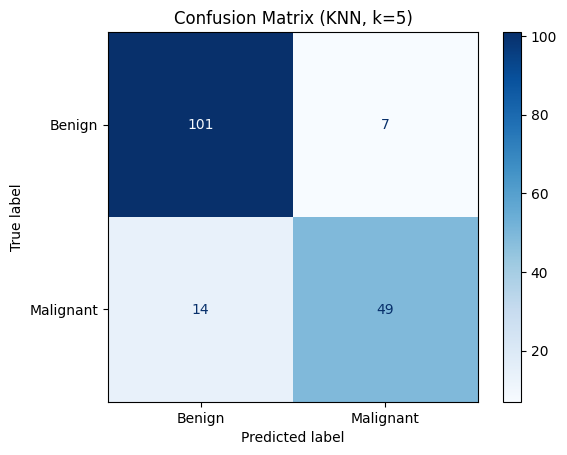

In [154]:
CM_5 = confusion_matrix(y_test, y_pred_5)
print("Confusion Matrix (k=5):\n", CM_5)

disp = ConfusionMatrixDisplay(
    confusion_matrix=CM_5,
    display_labels=["Benign", "Malignant"]
)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN, k=5)")
plt.show()

# c. Scatter Plot + Decision Boundary (k = 5)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


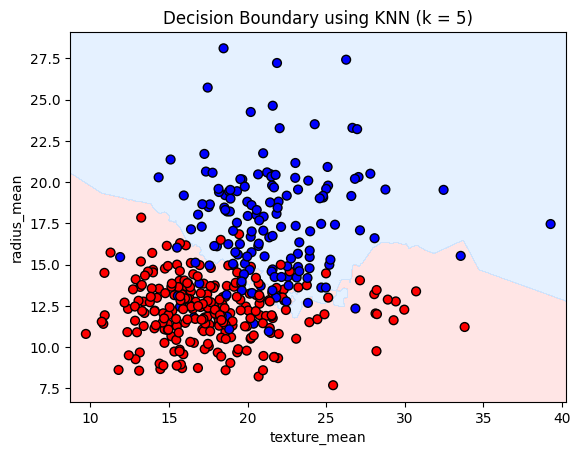

In [155]:
plot_decision_boundary(
    knn_5, X_train, y_train,
    "Decision Boundary using KNN (k = 5)"
)

- smaller k -> more irregular, comple boundary
- model is sensitive to noise and local variations

### Conclusion :
- The decision boundary for KNN with 𝑘 = 5 is highly non-linear, showing strong sensitivity to local data patterns.
- This allows effective separation of benign and malignant tumors but also introduces some overlap near the boundary.
- The model demonstrates high flexibility with a risk of overfitting due to its dependence on nearby points.

# d. Scatter Plot + Decision Boundary (k = 15)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


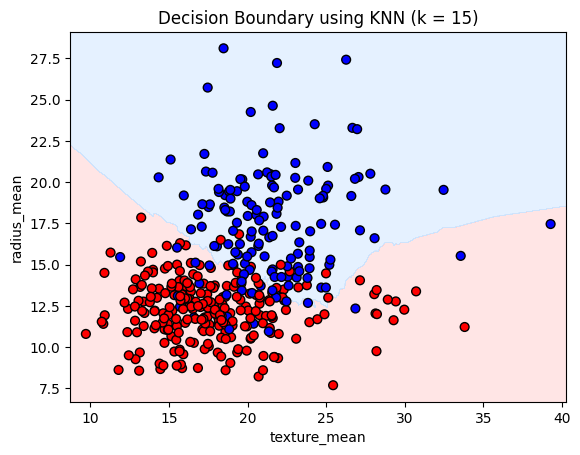

In [156]:
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train)

plot_decision_boundary(
    knn_15, X_train, y_train,
    "Decision Boundary using KNN (k = 15)"
)

- larger k -> smoother boundary
- less overfitting, more bias
- generalizes better than smaller value of k

Conclusion:
- The decision boundary for KNN with k = 15 is smoother and less sensitive to local variations in the dataset.
- This results in better generalization and reduced overfitting compared to smaller values of k.
- The model provides a more stable classification of benign and malignant tumors, though it may slightly reduce sensitivity to finer data patterns.

# Evaluation

### Accuracy
- It measures the overall correctness of the model.

$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$


### Precision
- It measures how reliable the positive predictions are.

$
Precision = \frac{TP}{TP + FP}
$

### Recall
- It measures how well the model finds actual positive cases.

$
Precision = \frac{TP}{TP + FN}
$

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [158]:
# for k = 5
acc_5 = accuracy_score(y_test, y_pred_5)
prec_5 = precision_score(y_test, y_pred_5)
rec_5 = recall_score(y_test, y_pred_5)

print("KNN (k=5)")
print("Accuracy :", acc_5)
print("Precision:", prec_5)
print("Recall   :", rec_5)

KNN (k=5)
Accuracy : 0.8771929824561403
Precision: 0.875
Recall   : 0.7777777777777778


In [159]:
# for k = 15
y_pred_15 = knn_15.predict(X_test)

acc_15 = accuracy_score(y_test, y_pred_15)
prec_15 = precision_score(y_test, y_pred_15)
rec_15 = recall_score(y_test, y_pred_15)

print("\nKNN (k=15)")
print("Accuracy :", acc_15)
print("Precision:", prec_15)
print("Recall   :", rec_15)


KNN (k=15)
Accuracy : 0.9005847953216374
Precision: 0.9107142857142857
Recall   : 0.8095238095238095


- For k = 5
  - Slightly higher recall
  - More sensitive to noise

- For k = 15
  - More stable accuracy
  - Slightly lower recall but better generalization

In breast cancer diagnosis, a model with higher recall is often preferred, even if precision drops slightly.

# Conclusion

The K-Nearest Neighbours (KNN) algorithm was applied to the breast cancer diagnostic dataset to classify tumors as malignant or benign using selected features.

The model achieved good performance in terms of accuracy, precision, and recall, demonstrating its effectiveness for medical diagnosis.

The results showed that the choice of the value of k significantly influences model performance, with smaller k leading to higher variance and larger k providing better generalization.

 Since recall is critical in cancer detection, KNN proves to be a useful baseline model when appropriately tuned.
